In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

df=pd.read_csv('dataset2.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11222 non-null  int64 
 1   tweet       11222 non-null  object
 2   label       11222 non-null  object
 3   label2      11222 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 350.8+ KB


In [2]:
#label=df['label'].values
label=df['label2'].values 

tweet=df['tweet']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
features=vectorizer.fit_transform(tweet)

y = keras.utils.to_categorical(label)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test=train_test_split(features.toarray(),label,test_size=0.3,random_state=42, stratify=label)

In [4]:
print(features.shape, X_train.shape, X_test.shape)

(11222, 56234) (7855, 56234) (3367, 56234)


In [5]:
model = Sequential()
model.add(Dense(128, input_dim=features.shape[1],activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7198080   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 9

In [6]:
history=model.fit(X_train, y_train,validation_split=0.1,validation_data=(X_test, y_test), batch_size=500, epochs=50, verbose=2)

Epoch 1/50


C:\Users\mustafa\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


16/16 - 2s - loss: 1.0089 - accuracy: 0.6918 - val_loss: 0.7954 - val_accuracy: 0.7473 - 2s/epoch - 148ms/step
Epoch 2/50
16/16 - 1s - loss: 0.7352 - accuracy: 0.7472 - val_loss: 0.6450 - val_accuracy: 0.7473 - 1s/epoch - 91ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6664 - accuracy: 0.7472 - val_loss: 0.6353 - val_accuracy: 0.7473 - 1s/epoch - 89ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6597 - accuracy: 0.7472 - val_loss: 0.6358 - val_accuracy: 0.7473 - 1s/epoch - 91ms/step
Epoch 5/50
16/16 - 1s - loss: 0.6537 - accuracy: 0.7472 - val_loss: 0.6335 - val_accuracy: 0.7473 - 1s/epoch - 91ms/step
Epoch 6/50
16/16 - 1s - loss: 0.6490 - accuracy: 0.7472 - val_loss: 0.6323 - val_accuracy: 0.7473 - 1s/epoch - 92ms/step
Epoch 7/50
16/16 - 1s - loss: 0.6490 - accuracy: 0.7472 - val_loss: 0.6318 - val_accuracy: 0.7473 - 1s/epoch - 90ms/step
Epoch 8/50
16/16 - 1s - loss: 0.6486 - accuracy: 0.7472 - val_loss: 0.6312 - val_accuracy: 0.7473 - 1s/epoch - 91ms/step
Epoch 9/50
16/16 - 1s - loss: 0.6493 - acc

In [7]:
score=model.evaluate(X_test,y_test)
print(score)

106/106 [==============================] - 1s 5ms/step - loss: 0.5300 - accuracy: 0.8271
[0.530023455619812, 0.8271458148956299]


In [8]:
class_names = ["hiçbiri","nefret","saldırgan"]


In [9]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=100,verbose=0)
    
y_pred_bool = np.argmax(y_pred,axis=1)


print(classification_report(y_test, y_pred_bool,target_names=class_names ))

              precision    recall  f1-score   support

     hiçbiri       0.85      0.95      0.90      2516
      nefret       0.73      0.50      0.59       783
   saldırgan       0.00      0.00      0.00        68

    accuracy                           0.83      3367
   macro avg       0.52      0.48      0.50      3367
weighted avg       0.80      0.83      0.81      3367



C:\Users\mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Yeni Bölüm

In [10]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_bool))
print(metrics.accuracy_score(y_test,y_pred_bool))


[[2392  124    0]
 [ 390  393    0]
 [  45   23    0]]
0.8271458271458272


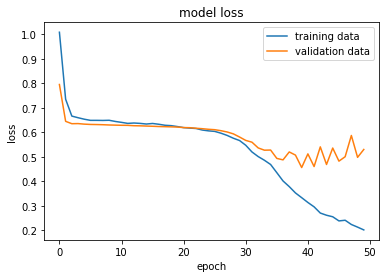

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

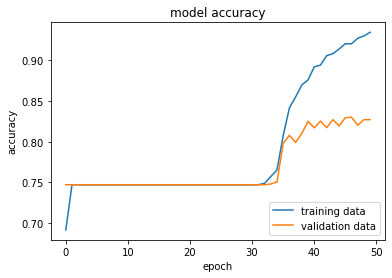

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

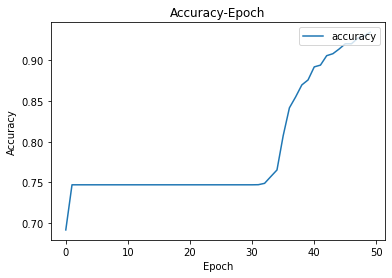

In [13]:
plt.plot(history.history['accuracy'])

plt.title('Accuracy-Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['accuracy'], loc = 'upper right')